In [1]:
from importlib import reload
from two_transmons import Rabi
reload(Rabi)
from two_transmons.Rabi import *
import two_transmons.DoubleTransmonSystem
from two_transmons.DoubleTransmonSystem import *
import two_transmons.VacuumRabiSimulation
from two_transmons.VacuumRabiSimulation import *
import single_transmon.Transmon
from single_transmon.Transmon import *
from ReadoutResonator import *
from qutip import *
from tqdm.notebook import tqdm
from two_transmons.ZPulse import *
from importlib import reload
import two_transmons.ParallelCalculations
from two_transmons.ParallelCalculations import *
from two_transmons.CalcTime import *
from two_transmons.Tomography import *
from scipy.linalg import cholesky


## Quantum Tomography

In [2]:
Nc = 7
Ec1 = 0.25 * 2 * np.pi
Ec2 = 1.03*Ec1
Ecc = 0.01/1.2**2 * 2 * np.pi # 1.2 is my estimate for n_{ge} matrix element
Ej1 = Ec1 * 100
Ej2 = Ec2 * 100
d = 0.2

T1_1, T2_1 = 10e6, 5e6
T1_2, T2_2 = 5e6, 1e6

tr1 = Transmon(Ec1, Ej1, d, 1/T1_1, 1/T2_1, Nc, 2, 1)
tr2 = Transmon(Ec2, Ej2, d, 1/T1_2, 1/T2_2, Nc, 2, 2)
dts = DoubleTransmonSystem(tr1, tr2, Ecc)
r = ReadoutResonator(6, 1118, 1964, phi=0.29)
r.set_qubit_parameters(.05, 0.05, 5, 5.3, .2, .2)


freq_lim = 0.2
farg=cook_farg(20,freq_lim)
params=farg[0]['params']
Ts = linspace(0, params["finish"], params['t_points'])
T = Tomography(dts, Ts, params, r)

#print(params)

<ipython-input-2-c363ac40e40b>:22: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  Ts = linspace(0, params["finish"], params['t_points'])


In [4]:
Tomography._operator_representation(T,Tomography.x_to_chi(rand(256)),2)

<ipython-input-4-203e8be499f1>:1: DeprecationWarning: scipy.rand is deprecated and will be removed in SciPy 2.0.0, use numpy.random.rand instead
  Tomography._operator_representation(T,Tomography.x_to_chi(rand(256)),2)


Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 9.33457058+0.j         -0.23692241+5.81009841j -4.13700421-2.39764091j
   3.4824673 -1.04264377j]
 [-0.23692241-5.81009841j 12.41232491+0.j         -3.22099703+6.25186926j
   0.90708068-5.65362533j]
 [-4.13700421+2.39764091j -3.22099703-6.25186926j 11.40913099+0.j
  -5.02421272+4.28180725j]
 [ 3.4824673 +1.04264377j  0.90708068+5.65362533j -5.02421272-4.28180725j
  10.43323635+0.j        ]]

In [4]:
T._options = Options(nsteps=20000, store_states = True)
T._c_ops = T._dts.c_ops(0, 1 / 2)


## Check the correctness of our gate

In [16]:
dm, dm_final = T.run_iswap_step_parallel([(0, 0),(T._pi_duration,0)], full_output = True)

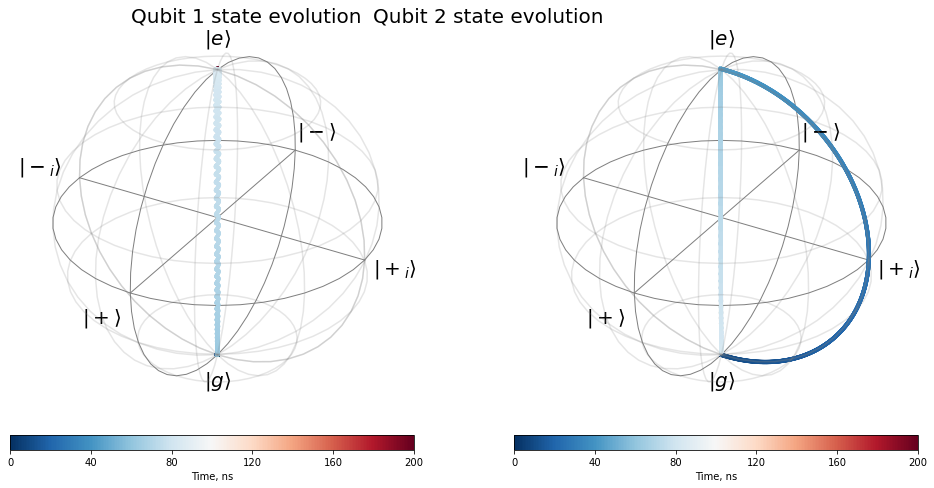

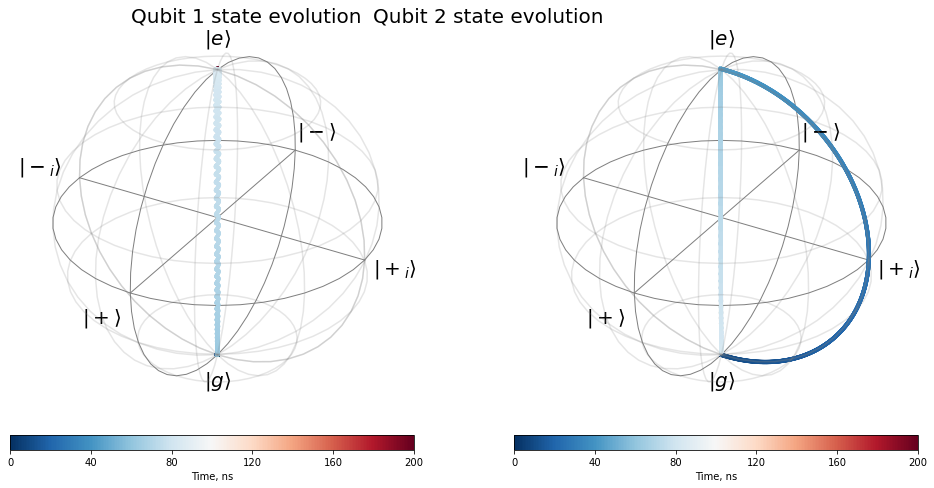

In [17]:
Tomography.plot_qubits_dynamic(T,0, dm = dm[0])

In [18]:
Tomography._find_rho_iswap(T,3,dm_final)

2.318592274669264 2.318592274669264
2.239992743151095 2.239992743151095
2.2399921440188693 2.2399921440188693



Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[ 4.13612168e-05+0.00000000e+00j -3.02831281e-05-1.05249553e-05j
  -5.53246690e-03+2.77396193e-03j -4.89292694e-05-3.22272344e-05j]
 [-3.02831281e-05+1.05249553e-05j  2.53545814e-05+0.00000000e+00j
   3.28481050e-03-3.61903558e-03j  2.88341061e-05+2.83123993e-05j]
 [-5.53246690e-03-2.77396193e-03j  3.28481050e-03+3.61903558e-03j
   9.98789177e-01+0.00000000e+00j -2.76671180e-05-3.73841192e-06j]
 [-4.89292694e-05+3.22272344e-05j  2.88341061e-05-2.83123993e-05j
  -2.76671180e-05+3.73841192e-06j  1.14410690e-03+0.00000000e+00j]]

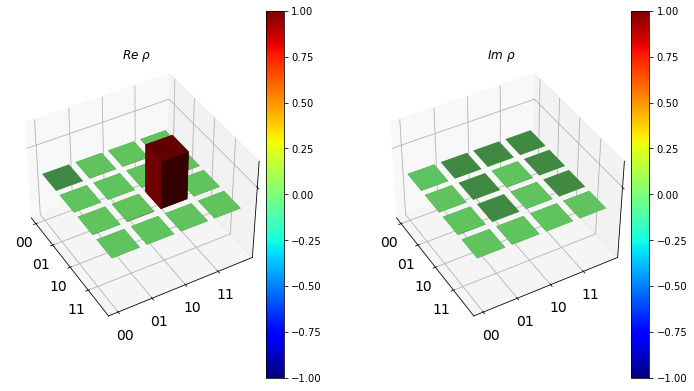

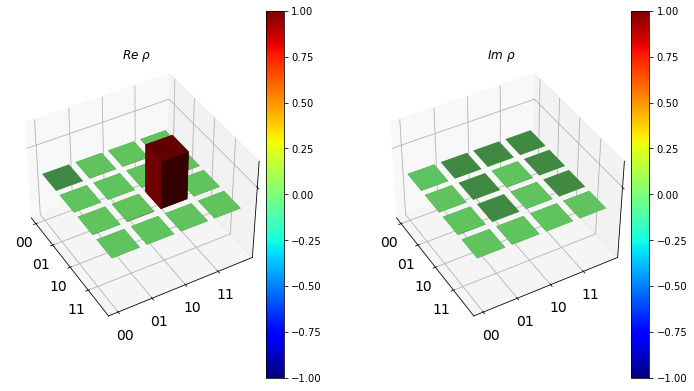

In [19]:
Tomography.show_density_matrix(dm_final[0])

## Launching a large series of experiments

In [ ]:
T.run_iswap()

In [ ]:
chi_tomo = T.process_tomo(3)

In [ ]:
R_tomo = T.chi_to_R(chi)

In [ ]:
labels = [['i','x','y','z']]*2
qpt_plot_combined(chi_tomo, labels)
      

In [37]:
reload (two_transmons.Tomography)
from two_transmons.Tomography import *

In [25]:
chi = Tomography.x_to_chi(random.rand(256))


(<Figure size 576x432 with 2 Axes>, <Axes3DSubplot:>)

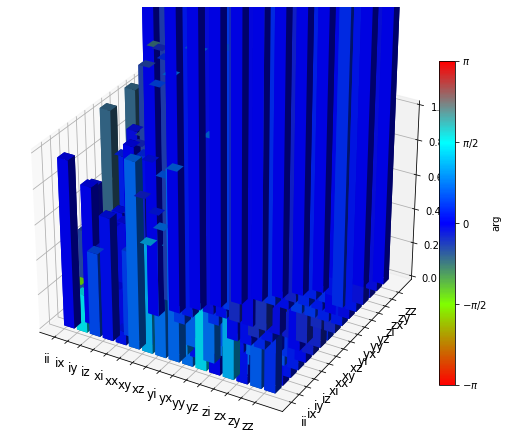

In [26]:
qpt_plot_combined(chi, xlabels)

In [9]:
T._2q_rotations

[((0, 0), (0, 0)),
 ((0, 0), (33.45, 0)),
 ((0, 0), (16.725, 0)),
 ((0, 0), (16.725, 3.141592653589793)),
 ((0, 0), (16.725, 1.5707963267948966)),
 ((0, 0), (16.725, -1.5707963267948966)),
 ((33.45, 0), (0, 0)),
 ((33.45, 0), (33.45, 0)),
 ((33.45, 0), (16.725, 0)),
 ((33.45, 0), (16.725, 3.141592653589793)),
 ((33.45, 0), (16.725, 1.5707963267948966)),
 ((33.45, 0), (16.725, -1.5707963267948966)),
 ((16.725, 0), (0, 0)),
 ((16.725, 0), (33.45, 0)),
 ((16.725, 0), (16.725, 0)),
 ((16.725, 0), (16.725, 3.141592653589793)),
 ((16.725, 0), (16.725, 1.5707963267948966)),
 ((16.725, 0), (16.725, -1.5707963267948966)),
 ((16.725, 3.141592653589793), (0, 0)),
 ((16.725, 3.141592653589793), (33.45, 0)),
 ((16.725, 3.141592653589793), (16.725, 0)),
 ((16.725, 3.141592653589793), (16.725, 3.141592653589793)),
 ((16.725, 3.141592653589793), (16.725, 1.5707963267948966)),
 ((16.725, 3.141592653589793), (16.725, -1.5707963267948966)),
 ((16.725, 1.5707963267948966), (0, 0)),
 ((16.725, 1.5707963267

## System spectrum

In [3]:
def freq_e10(phi,dts):
    E0 = dts.gg_state(phi, 1/2, True)[1]
    E10 = dts.e_state(phi, 1/2, 1, True)[1]
    E01 = dts.e_state(phi, 1/2, 2, True)[1]
    return ((E10-E01)/2/pi)

<ipython-input-4-0ed0799673bc>:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  phis = linspace (0,1,100)


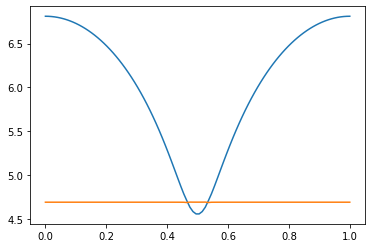

In [4]:
phis = linspace (0,1,100)
freq10 = []
freq01 = []
for phi in phis:
    E0 = dts.gg_state(phi, 1/2, True)[1]
    E10 = dts.e_state(phi, 1/2, 1, True)[1]
    E01 = dts.e_state(phi, 1/2, 2, True)[1]
    freq10.append((E10-E0)/2/pi)
    freq01.append((E01-E0)/2/pi)
plot (phis, freq10)
plot (phis, freq01)
    
    
    
    

In [5]:
root_scalar(freq_e10, args = (dts,), bracket = [0.45,0.5])

      converged: True
           flag: 'converged'
 function_calls: 5
     iterations: 4
           root: 0.4681163185242089

In [8]:
dts.e_state(0.4666, 1/2, 1, True)

(Quantum object: dims = [[2, 2], [1, 1]], shape = (4, 1), type = ket
 Qobj data =
 [[ 0.        ]
  [-0.66990991]
  [ 0.74244239]
  [ 0.        ]],
 29.423733286908803)

## Density matrix

In [3]:
T.run()

[Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True

In [5]:
'''
0 - nothing
1 - second pi /2
5 - second pi
7 - first pi/2
-7 - first pi
'''

'\n0 - nothing\n1 - second pi /2\n5 - second pi\n7 - first pi/2\n-7 - first pi\n'

<ipython-input-4-a27d3f4f6161>:5: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  density_matrix_re = real (density_matrix)
<ipython-input-4-a27d3f4f6161>:6: DeprecationWarning: scipy.imag is deprecated and will be removed in SciPy 2.0.0, use numpy.imag instead
  density_matrix_im = imag (density_matrix)


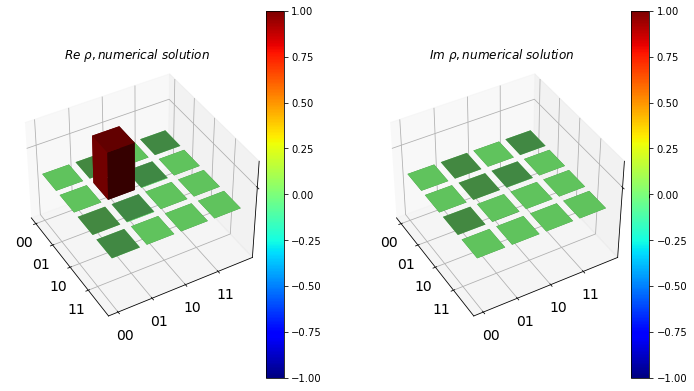

In [4]:
from matplotlib.pyplot import *


density_matrix = T._results[0].states[-1]
density_matrix_re = real (density_matrix)
density_matrix_im = imag (density_matrix)
fig = figure (figsize = (12,9) )
ax1=fig.add_subplot(121, projection = '3d')
ax2=fig.add_subplot(122, projection = '3d')
xlabels = ['00','01','10','11']
ylabels = ['00','01','10','11']
matrix_histogram (density_matrix_re, xlabels, ylabels, r'$Re\ \rho, numerical\ solution$', limits = [-1,1], fig = fig, ax = ax1)
matrix_histogram (density_matrix_im, xlabels, ylabels, r'$Im\ \rho, numerical\ solution$', limits = [-1,1], fig = fig, ax = ax2)
ax1.view_init(azim = -30, elev = 40)
ax2.view_init(azim = -30, elev = 40)

## Average projections time evolution

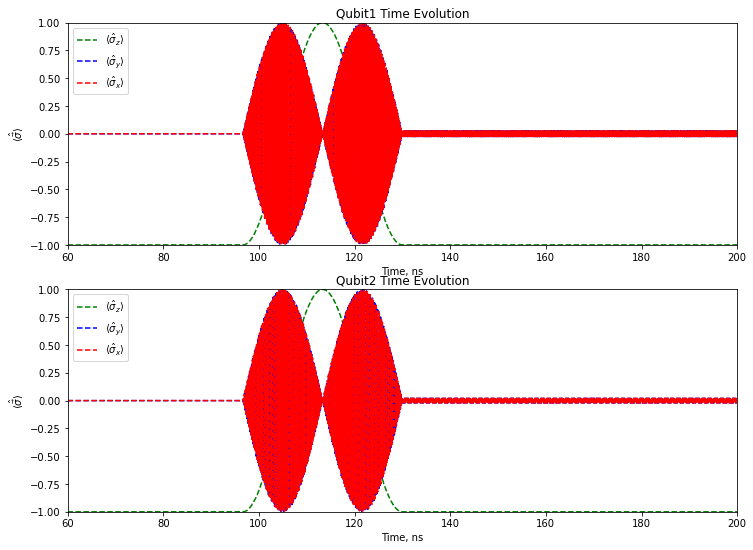

In [40]:

density_matrix = dm[7]
#density_matrix = density_matrix*density_matrix.dag()/density_matrix.tr()
fig = figure (figsize = (12,9) )
ax1=fig.add_subplot(211)
ax2=fig.add_subplot(212)
qubit1_z = expect(T.build_2qubit_operator('Z','id'), density_matrix)
qubit1_y = expect(T.build_2qubit_operator('Y','id'), density_matrix)
qubit1_x = expect(T.build_2qubit_operator('X','id'), density_matrix)
ax1.plot(Ts, qubit1_z, '--', color="green", label = "$\\langle \hat \\sigma_z\\rangle$")
ax1.plot(Ts, qubit1_y, '--', color="blue", label = "$\\langle \hat \\sigma_y\\rangle$")
ax1.plot(Ts, qubit1_x, '--', color="red", label = "$\\langle \hat \\sigma_x\\rangle$")
ax1.set(ylim = [-1,1], xlim = [params['start'], params['finish']], xlabel = "Time, ns", \
        ylabel = r"$\langle\hat\vec\sigma\rangle$", title = "Qubit1 Time Evolution")
ax1.legend(loc=2)
qubit2_z = expect(T.build_2qubit_operator('id','Z'), density_matrix)
qubit2_y = expect(T.build_2qubit_operator('id','Y'), density_matrix)
qubit2_x = expect(T.build_2qubit_operator('id','X'), density_matrix)
ax2.plot(Ts, qubit2_z, '--', color="green", label = "$\\langle \hat \\sigma_z\\rangle$")
ax2.plot(Ts, qubit2_y, '--', color="blue", label = "$\\langle \hat \\sigma_y\\rangle$")
ax2.plot(Ts, qubit2_x, '--', color="red", label = "$\\langle \hat \\sigma_x\\rangle$")
ax2.set(ylim = [-1,1], xlim = [params['start'], params['finish']],xlabel = "Time, ns", \
        ylabel = r"$\langle\hat\vec\sigma\rangle$",title = "Qubit2 Time Evolution")
ax2.legend(loc=2)


# Bloch sphere representation (in progress)

### Schrödinger picture

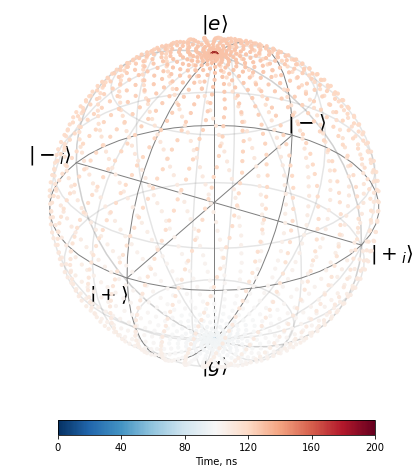

In [39]:
from qutip import *
import matplotlib
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import animation
from matplotlib import cm



    
fig = figure(figsize=(7,7))
axes = fig.add_axes([0.1, 0.2, 0.8, 0.8], projection="3d")
#axes = fig.add_axes(projection = "3d")
sph = Bloch(fig=fig, axes=axes)
sph.clear()
sph.sphere_alpha = 0
sph.zlabel = [r'$\left|e\rightangle\right.$', r"$\left|g\rightangle\right.$"]
#sph.xlpos = [1.3, -1.3]
sph.xlabel = [r'$\left.|+\right\rangle$', r"$\left.|-\right\rangle$"]
#sph.ylpos = [1.2, -1.3]
sph.ylabel = [r'$\left.|+_i\right\rangle$', r"$\left.|-_i\right\rangle$"]
#sph.xlpos = [1.3, -1.3]
nrm=matplotlib.colors.Normalize(0,Ts[-1])
colors=cm.RdBu_r(nrm(Ts))
sph.point_size=[40]
sph.point_color = list(colors)
sph.point_marker=['.']
sph.add_points([qubit2_x, qubit2_y, qubit2_z], meth='m')
#sph.add_points ([[1/sqrt(2),1,0],[1/sqrt(2),0,0],[0,0,1]])  
sph.render(fig,axes)


m = cm.ScalarMappable(cmap=cm.RdBu_r, norm=nrm)
m.set_array(Ts)
m.set_clim(0, Ts[-1])
position=fig.add_axes([0.2,0.15,0.63,0.03])
cb = fig.colorbar(m, orientation='horizontal', cax=position)
cb.set_label("Time, ns")
cb.set_ticks(np.linspace(0,round(Ts[-1]),6))
sph.make_sphere()





### Interaction picture (in case of constant flow through both qubits)

## Several examples of rotations

### $\frac{\pi}{2}_x,\ \frac{\pi}{2}_y$ 

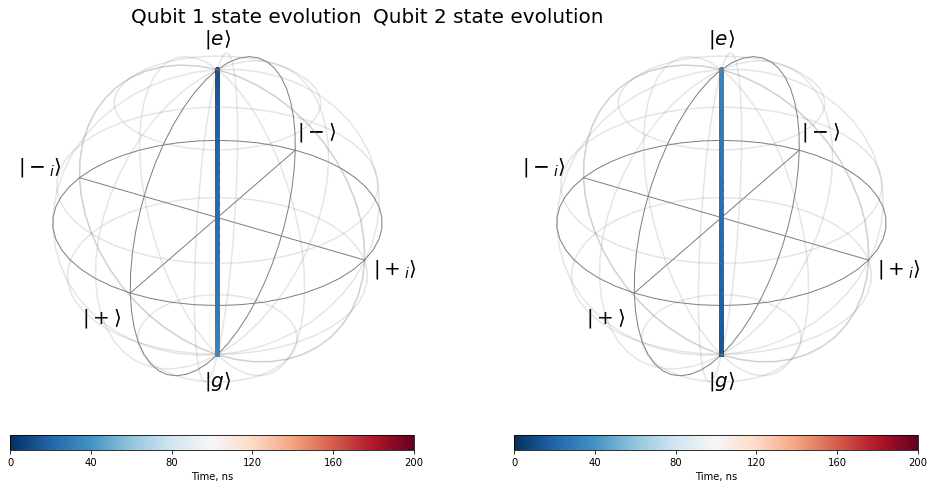

In [13]:
fig = T.plot_qubits_dynamic(0)
#fig.savefig("30.09.2021 vaccum rabi no rotations.png")

### $\pi\ _x,\ -\frac{\pi}{2}_y$ 

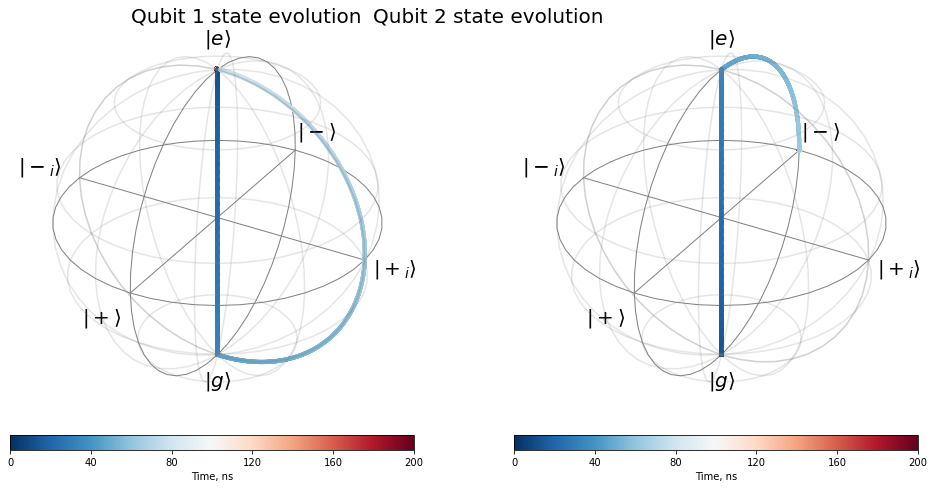

In [17]:
fig = T.plot_qubits_dynamic(-10)

#fig.savefig("30.09.2021 2qubit vaccuum rabi pi_x-pi/2 y.png")

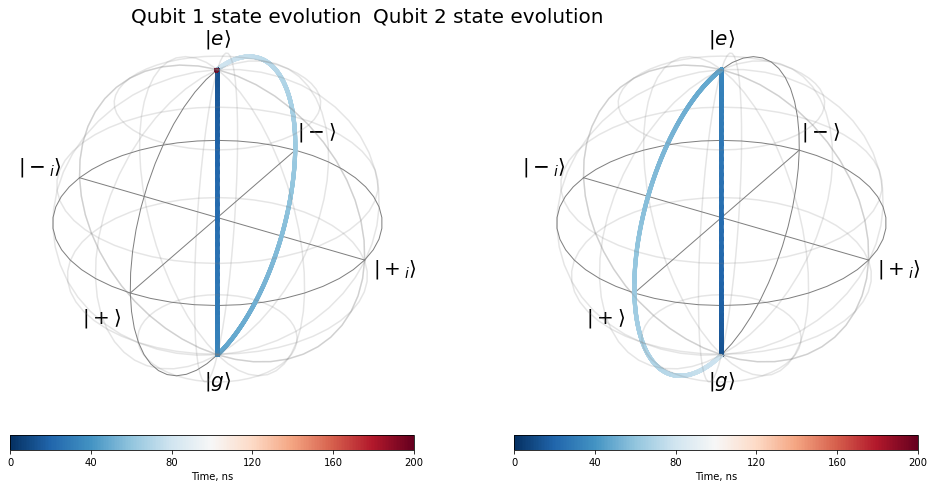

In [9]:
fig = T.plot_qubits_dynamic(-1)

In [7]:
T._H0[2]

Quantum object: dims = [[2, 2], [2, 2]], shape = (4, 4), type = oper, isherm = True
Qobj data =
[[0.         0.         0.         0.06012165]
 [0.         0.         0.06012165 0.        ]
 [0.         0.06012165 0.         0.        ]
 [0.06012165 0.         0.         0.        ]]

In [ ]:
#savefig("19.09.2021 Several exmples of 2 qubit rotations.png")

In [ ]:
"""
fig = figure()
ax = Axes3D (fig)
sphere = Bloch(axes = ax)
sphere.clear()


def animate (i):
    sphere.clear()
    sphere.add_states(qubit1_partial_trace[i])
    sphere.make_render()
    return ax
def init():
    sphere.vector_color = ['r']
    return ax
ani = animation.FuncAnimation(fig, animate, range(len(qubit1_partial_trace)),
                              init_func=init, blit=False, repeat=False)
"""

## Impact of dissipations




### Relaxation from excited state

In [ ]:
T._rho0 = dts.e_state(0, 1/2, 1)
T.run()
fig = T.plot_qubits_dynamic(0)

In [ ]:
fig = T.plot_qubits_dynamic(9)


In [ ]:
fig = T.plot_qubits_dynamic(-10)


In [ ]:
T._rho0 = dts.e_state(0, 1/2, 2)
T.run()
fig = T.plot_qubits_dynamic(0)


In [ ]:
fig = T.plot_qubits_dynamic(9)

In [ ]:
fig = T.plot_qubits_dynamic(-10)

In [ ]:
T._rho0 = 1/sqrt(2)*(dts.e_state(0, 1/2, 1)*1j+dts.gg_state(0, 1/2))
T.run()
fig = T.plot_qubits_dynamic(0)

In [ ]:
fig = T.plot_qubits_dynamic(9)

In [ ]:
fig = T.plot_qubits_dynamic(-10)

In [ ]:
T._rho0 = dts.ee_state(0, 1/2)
T.run()
fig = T.plot_qubits_dynamic(0)

In [ ]:
fig = T.plot_qubits_dynamic(9)

In [ ]:
fig = T.plot_qubits_dynamic(-10)

In [ ]:
T._rho0 = 1/2*(dts.gg_state(0, 1/2)+dts.e_state(0, 1/2, 1)+dts.e_state(0, 1/2, 2)+dts.ee_state(0, 1/2))
T.run()
fig = T.plot_qubits_dynamic(0)

In [ ]:
fig = T.plot_qubits_dynamic(9)

In [ ]:
fig = T.plot_qubits_dynamic(-10)

In [ ]:
#T._2q_rotations

## Comparison of the tomography state and the truth state

In [3]:
from scipy.optimize import *

In [4]:
T.run()

[Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True
 num_collapse = 4,
 Result object with mesolve data.
 --------------------------------
 states = True

In [ ]:
T.find_rho_all_parallel(averages = 10)

33it [31:39, 95.28s/it]

In [ ]:
rot_number = 0
dm_true = T._results[rot_number].states[-1]
dm_my_estimate =T.rho_tomo[rot_number]

In [ ]:
fig1 = Tomography.show_density_matrix(dm_true)
fig2 = Tomography.show_density_matrix(dm_my_estimate)
fidelity = (dm_my_estimate*dm_true).tr()
print ('fidelity =', fidelity)
#fig1.savefig('23.09.2021 dm_simulation_' + str(rot_number) + '.png')
#fig2.savefig('23.09.2021 dm_tomography_' + str(rot_number) + '.png')

In [ ]:
dm_true-dm_my_estimate

## Defining an appropriate impulse duration

### Single duration example

(-1.0, 1.0)

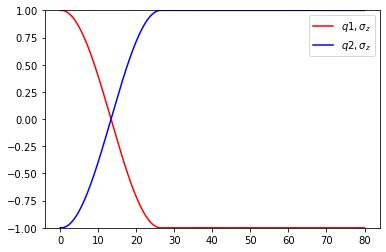

In [5]:
params = cook_farg(2, 0.2)[0]['params']
params['duration'] = 26.65

Rabi = Tomography(dts, Ts, params, r) 

fig, ax = subplots(1,1)

Rabi.run_iswap_check()
qubit1_z = expect(Rabi.build_2qubit_operator('Z','id'), Rabi._results_iswap.states)
qubit2_z = expect(Rabi.build_2qubit_operator('id','Z'), Rabi._results_iswap.states)
ax.plot(Ts,qubit1_z,'r',label='$q1, \sigma_z $') #,ylim=[0,1])
ax.plot(Ts,qubit2_z,'b', label='$q2, \sigma_z $')

ax.legend()
ax.set_ylim([-1.0,1.0])
#ax.set(title = 'frequency =' + str(freq))


### Depending on the duration plot

<ipython-input-10-d0a1bd2b46b6>:1: DeprecationWarning: scipy.linspace is deprecated and will be removed in SciPy 2.0.0, use numpy.linspace instead
  durations = linspace (10,35, 50)


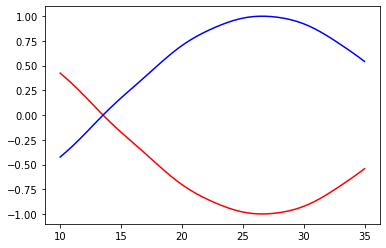

In [10]:
durations = linspace (10,35, 50)
params = cook_farg(2, 0.2)[0]['params']
qubit1_z = []
qubit2_z = []
fig, ax = subplots(1,1)
for dur in durations:
    params['duration'] = dur
    Rabi = Tomography(dts, Ts, params, r) 
    Rabi.run_iswap_check()
    qubit1_z.append(expect(Rabi.build_2qubit_operator('Z','id'), Rabi._results_iswap.states[-1]))
    qubit2_z.append(expect(Rabi.build_2qubit_operator('id','Z'), Rabi._results_iswap.states[-1]))
ax.plot(durations, qubit1_z,'r',label='$q1, \sigma_z $') #,ylim=[0,1])
ax.plot(durations, qubit2_z,'b', label='$q2, \sigma_z $')


In [12]:
#fig.savefig('30.09.2021 vaccum-rabi dependence on the duration.png')

### Defining an appropriate rabi pulse duration

In [3]:
def sigma_z_avg(dur,dts):
    params = cook_farg(2, 0.2)[0]['params']
    params['duration'] = dur
    Rabi = Tomography(dts, Ts, params, r) 
    Rabi.run_iswap_check()
    return(real(expect(Rabi.build_2qubit_operator('Z','id'), Rabi._results_iswap.states[-1])) + 1)


In [4]:
from scipy.optimize import *
minimize(sigma_z_avg,x0 = 20, args = (dts,))

<ipython-input-3-48bb16c9f8ef>:6: DeprecationWarning: scipy.real is deprecated and will be removed in SciPy 2.0.0, use numpy.real instead
  return(real(expect(Rabi.build_2qubit_operator('Z','id'), Rabi._results_iswap.states[-1])) + 1)


      fun: 0.000166057182192203
 hess_inv: array([[162.16909152]])
      jac: array([3.35276127e-07])
  message: 'Optimization terminated successfully.'
     nfev: 26
      nit: 4
     njev: 13
   status: 0
  success: True
        x: array([26.65365281])

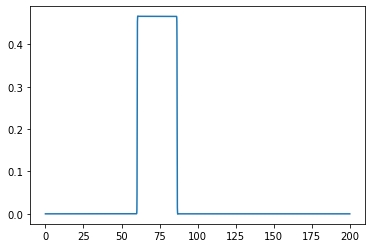

In [13]:
signal = ZPulse(Ts,params)
signal.plot()
signal.plot_ideal()

# Tomography of an operator

{'phi': 0.41,
 'params': {'duration': 0,
  'tanh_sigma': 0.1,
  'start': 10,
  'finish': 300,
  'phi_base_level': 0,
  'phi_offset': 0.4675,
  't_points': 10000,
  'frequency': 0.2}}